<a href="https://colab.research.google.com/github/cloudy-windy-rainy/jubilant-parakeet/blob/gh-pages/Example220111.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets,transforms
from matplotlib import pyplot as plt
%matplotlib inline


In [3]:
is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

print('current cuda device is',device)

current cuda device is cuda


In [4]:
train_data = datasets.MNIST(root='./data', train=True, download=True, transform= transforms.ToTensor())
test_data = datasets.MNIST(root='./data', train=False, transform= transforms.ToTensor())
print('number of training data :', len(train_data))
print('number of test data: ', len(test_data))

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

number of training data : 60000
number of test data:  10000


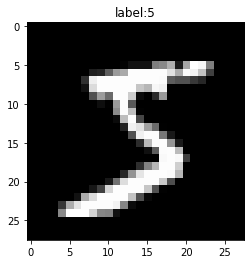

In [5]:
image, label = train_data[0]
plt.imshow(image.squeeze().numpy(),cmap = 'gray')
plt.title('label:%s'%label)
plt.show()

In [6]:
batch_size = 50         #Assigned batch size
train_loader = torch.utils.data.DataLoader(dataset = train_data, batch_size = batch_size, shuffle = True) # dataset: minibatch로 구성할 data
test_loader= torch.utils.data.DataLoader(dataset = test_data, batch_size=batch_size,shuffle = True)

first_batch = train_loader.__iter__().__next__()

print('{:15s}|{:<25s}|{}'.format('name','type','size'))

print('{:15s}|{:<25s}|{}'.format('Num of Batch','',len(train_loader)))

print('{:15s}|{:<25s}|{}'.format('First_batch',str(type(first_batch)),len(first_batch)))
print('{:15s}|{:<25s}|{}'.format('First_batch[0]',str(type(first_batch[0])),first_batch[0].shape))
print('{:15s}|{:<25s}|{}'.format('First_batch[1]',str(type(first_batch[1])),first_batch[1].shape))

name           |type                     |size
Num of Batch   |                         |1200
First_batch    |<class 'list'>           |2
First_batch[0] |<class 'torch.Tensor'>   |torch.Size([50, 1, 28, 28])
First_batch[1] |<class 'torch.Tensor'>   |torch.Size([50])


In [14]:


class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.cov1 = nn.Conv2d(1,23,3,1)
    self.cov2 = nn.Conv2d(32,64,3,1)
    self.dropout1 = nn.Dropout2d(0.25)
    self.dropout2 = nn.Dropout2d(0.5)
    self.fc1 = nn.Linear(9216,128)
    self.fc2 - nn.Linear(128,10)


    def forward(self, x):
      x = self.conv1(x)
      x = F.relu(x)
      x = self.conv2(x)
      x = F.relu(x)
      x = F.max_pool2d_p(x,2)
      x = self.dropout1(x)
      x = torch.flatten(x,1)
      x = self.fc1(x)
      x = F.relu(x)
      x = self.dropout2(x)
      x = self.fc2(x)
      output = F.log_softmax(x,dim = 1)

      return output



In [15]:
model = CNN().to(devide)
optimizer = optim.Adam(model.parameters(),lr = learninbg_rate)
criterion = nn.CrossEntropyLoss()

print(model)

AttributeError: ignored